In [1]:
# Importing packages

from glob import glob
from os.path import join
from os import getcwd
from xcodex.main import download_file, xco2_extract

In [2]:
# Setting historical serie

start_date = "1st of January, 2015"
end_date = "31st of January, 2015"

download_file(start_date, end_date) # Downloading .nc4 files (Global)

Downloading: oco2_GEOS_L3CO2_day_20150105_B10206Ar.nc4 - 100.00% | Speed: 36.86 KB/swnloading: oco2_GEOS_L3CO2_day_20150106_B10206Ar.nc4 - 34.12% | Speed: 12.60 KB/s
File download completed: oco2_GEOS_L3CO2_day_20150105_B10206Ar.nc4
Downloading: oco2_GEOS_L3CO2_day_20150104_B10206Ar.nc4 - 96.03% | Speed: 35.33 KB/ssownloading: oco2_GEOS_L3CO2_day_20150102_B10206Ar.nc4 - 39.00% | Speed: 14.37 KB/s
File download completed: oco2_GEOS_L3CO2_day_20150106_B10206Ar.nc4
Downloading: oco2_GEOS_L3CO2_day_20150101_B10206Ar.nc4 - 79.70% | Speed: 29.32 KB/ss
File download completed: oco2_GEOS_L3CO2_day_20150107_B10206Ar.nc4
Downloading: oco2_GEOS_L3CO2_day_20150101_B10206Ar.nc4 - 81.65% | Speed: 30.04 KB/ss
File download completed: oco2_GEOS_L3CO2_day_20150104_B10206Ar.nc4
Downloading: oco2_GEOS_L3CO2_day_20150111_B10206Ar.nc4 - 100.00% | Speed: 36.78 KB/s
File download completed: oco2_GEOS_L3CO2_day_20150111_B10206Ar.nc4
Downloading: oco2_GEOS_L3CO2_day_20150102_B10206Ar.nc4 - 100.00% | Speed: 36.

In [3]:
arquive_folder = glob(join(getcwd(), "downloaded_data", "*.nc4")) # Selecting the folder with nc4 files (Default location)

# Setting desired locations to build a time series XCO2 data

locations = dict(Mauna_loa=[19.479488, -155.602829],
                 New_York=[40.712776, -74.005974],
                 Paris=[48.856613, 2.352222])

In [4]:
df = xco2_extract(path=arquive_folder,
                  start=start_date,
                  end=end_date,
                  missing_data=False,
                  **locations); df # Extracting XCO2

,location,jd,day,month,year,lat,lon,lat_index,lon_index,XCO2,XCO2_prec
0,Mauna_loa,1.0,1.0,1.0,2015.0,19.479488,-155.602829,219.0,39.0,398.649339,1.122895e-07
1,Mauna_loa,2.0,2.0,1.0,2015.0,19.479488,-155.602829,219.0,39.0,398.136021,1.122895e-07
2,Mauna_loa,3.0,3.0,1.0,2015.0,19.479488,-155.602829,219.0,39.0,398.241798,1.122895e-07
3,Mauna_loa,4.0,4.0,1.0,2015.0,19.479488,-155.602829,219.0,39.0,398.501808,1.122895e-07
4,Mauna_loa,5.0,5.0,1.0,2015.0,19.479488,-155.602829,219.0,39.0,398.525179,1.122895e-07
...,...,...,...,...,...,...,...,...,...,...,...
88,Paris,27.0,27.0,1.0,2015.0,48.856613,2.352222,278.0,292.0,400.524325,3.741323e-07
89,Paris,28.0,28.0,1.0,2015.0,48.856613,2.352222,278.0,292.0,400.489120,3.741323e-07
90,Paris,29.0,29.0,1.0,2015.0,48.856613,2.352222,278.0,292.0,400.542653,3.741323e-07
91,Paris,30.0,30.0,1.0,2015.0,48.856613,2.352222,278.0,292.0,400.616223,3.741323e-07


# Data visualization

In [6]:
## set mapbox access token
import plotly.express as px
import plotly.graph_objs as go

px.set_mapbox_access_token('pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA')

# Plotly configs

fig= px.scatter_mapbox(df,
                              lat= 'lat',
                              lon= 'lon',
                              color= 'XCO2',
                              zoom= .85,
                              width=960,
                              height=540,
                              size_max=10,
                              hover_name='location',
                              color_continuous_scale=px.colors.cyclical.IceFire)

fig.update_layout(mapbox_style="open-street-map") #dark


layout = go.Layout(margin=go.layout.Margin(
    l=0,
    r=0,
    b=0,
    t=0))


fig.update_layout(layout,
                  autosize=False,
                  height=540,
                  width=960,
                  hovermode="closest")

# Saving the output image

#fig.write_html('xcodex_map.html')
#fig.write_image("xcodex_map.png", scale=2)

fig.show()

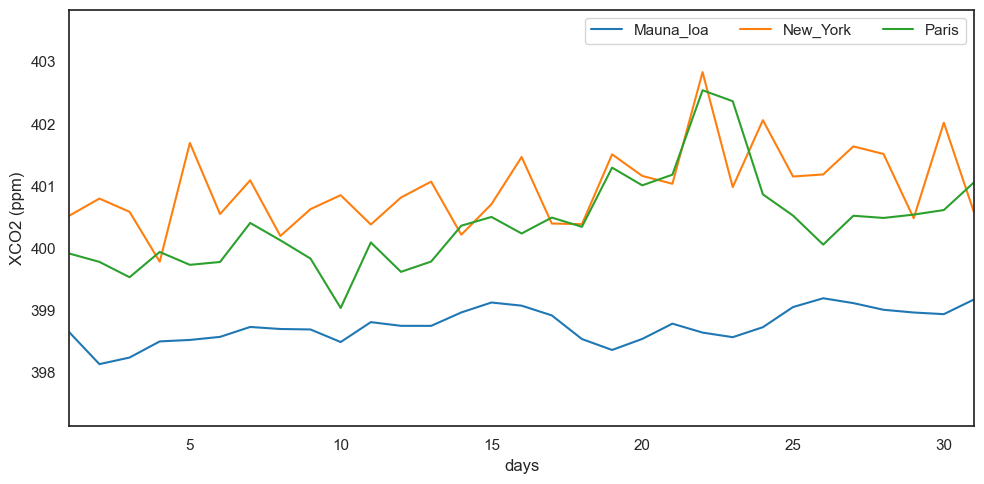

In [10]:
# Showing XCO2 behavior in time serie

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.set_theme(font_scale=1, style="white")

sns.lineplot(data=df,
             x="jd",
             y='XCO2',
             hue='location',
             errorbar=('ci',0),
             palette="tab10")

plt.xlabel("days")
plt.ylabel("XCO2 (ppm)")

plt.xlim(min(df.jd), max(df.jd))
plt.ylim(min(df.XCO2-1), max(df.XCO2+1))

sns.despine(right=False,
            top=False)

plt.legend(ncol=3)

plt.tight_layout()

#plt.savefig("xcodex_locations.png", dpi=300)

plt.show()